C:\Users\vikas\AppData\Local\Temp\ipykernel_21984\3214932122.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  h = np.linalg.lstsq(A, b)[0]


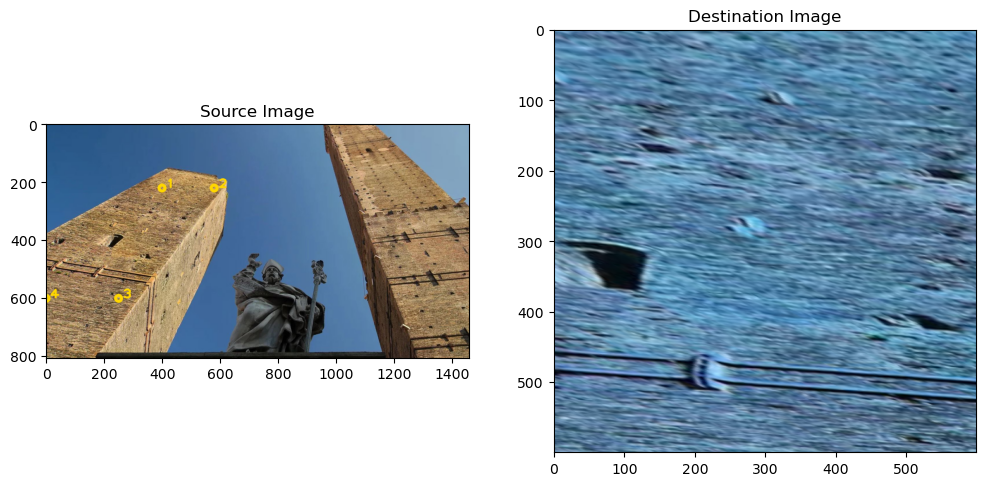

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def get_homography_matrix(source, destination):

    assert len(source) >= 4, "must provide more than 4 source points"
    assert len(destination) >= 4, "must provide more than 4 destination points"
    assert len(source) == len(destination), "source and destination must be of equal length"
    A = []
    b = []
    for i in range(len(source)):
        s_x, s_y = source[i]
        d_x, d_y = destination[i]
        A.append([s_x, s_y, 1, 0, 0, 0, (-d_x)*(s_x), (-d_x)*(s_y)])
        A.append([0, 0, 0, s_x, s_y, 1, (-d_y)*(s_x), (-d_y)*(s_y)])
        b += [d_x, d_y]
    A = np.array(A)
    h = np.linalg.lstsq(A, b)[0]
    h = np.concatenate((h, [1]), axis=-1)
    return np.reshape(h, (3, 3))


if __name__ == "__main__":
    source_points = np.array([
        [400, 220],[580,220],
        [250, 600],
        [0, 600],
    ])
    destination_points = np.array([
        [0, 0],
        [600, 0],
        [600, 600],
        [0, 600],
    ])
    source_image = cv2.imread("hmg.jpg")
    t_source_image = source_image.copy()

    # draw markings on the source image
    for i, pts in enumerate(source_points):
        cv2.putText(source_image, str(i+1), (pts[0] + 15, pts[1]), cv2.FONT_HERSHEY_PLAIN, 3, (0, 215, 255), 5)
        cv2.circle(source_image, pts, 10, (0, 215, 255), 10)

    h = get_homography_matrix(source_points, destination_points)
    destination_image = cv2.warpPerspective(t_source_image, h, (600, 600))
    
    destination_image = cv2.cvtColor(destination_image, cv2.COLOR_BGR2RGB)
    img  = Image.fromarray(destination_image)
    # Saving the image
    img.save("Image_from_array.jpg")
    
    figure = plt.figure(figsize=(12, 6))

    subplot1 = figure.add_subplot(1, 2, 1)
    subplot1.title.set_text("Source Image")
    subplot1.imshow(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))

    subplot2 = figure.add_subplot(1, 2, 2)
    subplot2.title.set_text("Destination Image")
    subplot2.imshow(cv2.cvtColor(destination_image, cv2.COLOR_BGR2RGB))

    # plt.show()
    plt.savefig("output.png")


In [ ]:
h

In [2]:
destination_image

array([[[139, 191, 231],
        [137, 191, 230],
        [135, 190, 230],
        ...,
        [ 83, 143, 182],
        [ 85, 145, 183],
        [ 86, 147, 185]],

       [[124, 174, 212],
        [127, 178, 218],
        [129, 181, 221],
        ...,
        [ 90, 149, 188],
        [ 89, 148, 187],
        [ 90, 150, 188]],

       [[113, 161, 198],
        [116, 165, 202],
        [118, 168, 206],
        ...,
        [ 98, 157, 196],
        [ 97, 156, 195],
        [ 94, 153, 192]],

       ...,

       [[112, 145, 177],
        [112, 144, 176],
        [110, 140, 174],
        ...,
        [153, 191, 217],
        [150, 188, 213],
        [146, 184, 210]],

       [[106, 142, 176],
        [108, 144, 178],
        [111, 147, 181],
        ...,
        [140, 178, 204],
        [141, 180, 206],
        [142, 182, 207]],

       [[ 96, 138, 171],
        [100, 140, 174],
        [104, 143, 178],
        ...,
        [115, 156, 180],
        [116, 156, 181],
        [122, 162, 187]]

In [48]:
print(np.linalg.inv(A))

[[  1.          13.          -9.        ]
 [ -2.         -29.          20.        ]
 [  1.          15.66666667 -10.66666667]]


In [34]:
t_source_image[0][0]

array([133,  85,  37], dtype=uint8)

In [49]:
h = np.linalg.inv(A)
h

array([[  1.        ,  13.        ,  -9.        ],
       [ -2.        , -29.        ,  20.        ],
       [  1.        ,  15.66666667, -10.66666667]])

In [50]:
# Program to multiply two matrices using nested loops

# take a 3x3 matrix
h = [[  1        ,  13        ,  -9       ],
       [ -2        , -29        ,  20        ],
       [  1       ,  15.66666667, -10.66666667]]

# take a 3x4 matrix
B = [[200],
	[400],
	[1]]

result = [[0],
		[0],
		[0]]

# iterating by row of A
for i in range(len(h)):

	# iterating by column by B
	for j in range(len(B[0])):

		# iterating by rows of B
		for k in range(len(B)):
			result[i][j] += h[i][k] * B[k][j]

for r in result:
	print(r)


[5391]
[-11980]
[6456.00000133]


In [29]:
# to calculate the transformation matrix
input_pts = np.float32([[80,1286],[3890,1253],[3890,122],[450,115]])
output_pts = np.float32([[100,100],[100,3900],[2200,3900],[2200,100]])
 
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
 
# Apply the perspective transformation to the image
out = cv2.warpPerspective(img,M,(img.shape[1], img.shape[0]),flags=cv2.INTER_LINEAR)
 
# Display the transformed image
plt.imshow(out)

NameError: name 'img' is not defined

In [1]:
import cv2
import numpy as np
 
if __name__ == '__main__' :
 
    # Read source image.
    im_src = cv2.imread('hmg.jpg')
    # Four corners of the book in source image
    pts_src = np.array([
        [400, 220],[580,220],
        [250, 600],
        [0, 600],
    ])
 
    # Read destination image.
    #im_dst = cv2.imread('book1.jpg')
    # Four corners of the book in destination image.
    pts_dst = np.array([
        [0, 0],
        [600, 0],
        [600, 600],
        [0, 600],
    ])
 
    # Calculate Homography
    h, status = cv2.findHomography(pts_src, pts_dst)
 
    # Warp source image to destination based on homography
    im_out = cv2.warpPerspective(im_src, h, (600,600))
 
    # Display images
    cv2.imshow("Source Image", im_src)
    #cv2.imshow("Destination Image", im_dst)
    cv2.imshow("Warped Source Image", im_out)
    im_out.savefig("output.png")
    cv2.waitKey(0)

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

In [11]:
import cv2
vidcap = cv2.VideoCapture('pedestrian-safety-use-pedestrian-crossing-avoid-jaywalking-cyberabad-traffic-police.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def get_homography_matrix(source, destination):
    """ Calculates the entries of the Homography matrix between two sets of matching points.
    Args
    ----
        - `source`: Source points where each point is int (x, y) format.
        - `destination`: Destination points where each point is int (x, y) format.
    Returns
    ----
        - A numpy array of shape (3, 3) representing the Homography matrix.
    Raises
    ----
        - `source` and `destination` is lew than four points.
        - `source` and `destination` is of different size.
    """
    assert len(source) >= 4, "must provide more than 4 source points"
    assert len(destination) >= 4, "must provide more than 4 destination points"
    assert len(source) == len(destination), "source and destination must be of equal length"
    A = []
    b = []
    for i in range(len(source)):
        s_x, s_y = source[i]
        d_x, d_y = destination[i]
        A.append([s_x, s_y, 1, 0, 0, 0, (-d_x)*(s_x), (-d_x)*(s_y)])
        A.append([0, 0, 0, s_x, s_y, 1, (-d_y)*(s_x), (-d_y)*(s_y)])
        b += [d_x, d_y]
    A = np.array(A)
    h = np.linalg.lstsq(A, b)[0]
    h = np.concatenate((h, [1]), axis=-1)
    return np.reshape(h, (3, 3))


if __name__ == "__main__":
    source_points = np.array([
        [0, 0],[850,0],
        [850, 490],
        [0, 490],
    ])
    destination_points = np.array([
        [0, 0],
        [600, 0],
        [600, 600],
        [0, 600],
    ])
    source_image = cv2.imread("image1.jpg")
    t_source_image = source_image.copy()

    # draw markings on the source image
    for i, pts in enumerate(source_points):
        cv2.putText(source_image, str(i+1), (pts[0] + 15, pts[1]), cv2.FONT_HERSHEY_PLAIN, 3, (0, 215, 255), 5)
        cv2.circle(source_image, pts, 10, (0, 215, 255), 10)

    h = get_homography_matrix(source_points, destination_points)
    destination_image = cv2.warpPerspective(t_source_image, h, (600, 600))
    
    destination_image = cv2.cvtColor(destination_image, cv2.COLOR_BGR2RGB)
    img  = Image.fromarray(destination_image)
    # Saving the image
    img.save("Image_from_array.jpg")
    
#     figure = plt.figure(figsize=(20, 10))

#     subplot1 = figure.add_subplot(1, 2, 1)
#     subplot1.title.set_text("Source Image")
#     subplot1.imshow(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))

#     subplot2 = figure.add_subplot(1, 2, 2)
#     subplot2.title.set_text("Destination Image")
#     subplot2.imshow(cv2.cvtColor(destination_image, cv2.COLOR_BGR2RGB))

#     # plt.show()
#     plt.savefig("output.png")


C:\Users\vikas\AppData\Local\Temp\ipykernel_26004\1682718804.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  h = np.linalg.lstsq(A, b)[0]


In [22]:
h

array([[ 7.05882353e-01, -2.60706353e-16, -7.59362611e-14],
       [-1.66184230e-16,  1.22448980e+00, -1.38905160e-13],
       [-4.88910494e-19, -5.53661284e-19,  1.00000000e+00]])

In [24]:
h = np.linalg.inv(h)
h

array([[1.41666667e+00, 3.01622766e-16, 1.07576370e-13],
       [1.92265921e-16, 8.16666667e-01, 1.13439214e-13],
       [6.92623200e-19, 4.52156715e-19, 1.00000000e+00]])

In [3]:
from moviepy.editor import VideoFileClip

In [11]:
videoclip = VideoFileClip("file.mp4")
# new_clip = videoclip.without_audio()
# new_clip.write_videofile("final_cut.mp4")

In [12]:
new_clip = videoclip.without_audio()

In [14]:
new_clip.write_videofile("final_cut.mp4")

Moviepy - Building video final_cut.mp4.
Moviepy - Writing video final_cut.mp4



TypeError: must be real number, not NoneType

In [9]:

import sys
import os
#import gevent


def convert_to_mp4(path, new_filename, old_filename):
    threads = 4
    os.chdir(path)
    try:
        os.system("ffmpeg -i %s -threads %d -f mp4 %s" %(old_filename, threads, new_filename))
        print("ffmpeg completed converting for %s" % old_filename)
        if os.path.exists(new_filename):
            os.remove(old_filename)
    except:
        raise
        print("Something went wrong")


if __name__ == "__main__":
    path = sys.argv[1]
    if path:
        all_files = os.listdir(path)
        tasks = [convert_to_mp4(path, filename.split('.')[0]+'.mp4', filename) for filename in all_files if filename.endswith('.MTS')]

FileNotFoundError: [WinError 3] The system cannot find the path specified: '-f'

In [10]:
import subprocess

# Set the path to your MTS file
input_file = "00020.MTS"

# Set the output file name and location
output_file = "file.mp4"

# Run the FFmpeg command to convert the file
subprocess.call(['ffmpeg', '-i', input_file, '-codec', 'copy', output_file])

0

In [2]:
!pip install moviepy

     ------------------------------------ 388.3/388.3 kB 239.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 22.6/22.6 MB 730.6 kB/s eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110728 sha256=38bcaecbf35819177a0eb9aa79bec4142971edf3ed16612c2c84d24a858db025
  Stored in directory: c:\users\vikas\appdata\local\pip\cache\wheels\29\15\e4\4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [1]:
import subprocess

# Set the path to your MTS file
input_file = "00004.MTS"

# Set the output file name and location
output_file = "00004.mp4"

# Run the FFmpeg command to convert the file
subprocess.call(['ffmpeg', '-i', input_file, '-codec', 'copy', output_file])


# # # import subprocess

# # # Set the path to your input MP4 file
# input_file = "00046.mp4"

# # # Set the output file name and location
# output_file = "11.mp4"

# # Run the FFmpeg command to remove audio
# subprocess.call(['ffmpeg', '-i', input_file, '-c:v', 'copy', '-an', output_file])


0

In [20]:
import subprocess

# Set the path to your input MP4 file
input_file = "00047.mp4"

# Set the output file name and location
output_file = "1.mp4"

# Run the FFmpeg command to remove audio
subprocess.call(['ffmpeg', '-i', input_file, '-c:v', 'copy', '-an', output_file])


0